## Testing raw code to inital transciptome analysis

### This is pre-code !

### Data import and pre-process

In [120]:
import pandas as pd
import numpy as np
import Bio
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
trinity_DS2_raw = pd.read_csv("csv_data/MOJE_Trinity_DS2.csv", delimiter=";", header=1) 
trinity_M12_raw = pd.read_csv("csv_data/MOJE_Trinity_M12.csv", delimiter=";", header=1) 
trinity_RXL_raw = pd.read_csv("csv_data/MOJE_Trinity_RXL.csv", delimiter=";", header=1) 
# DS2/m12/rxl strains - full contig expression data set: 2w / 3bzw

In [122]:
ds2_raw = pd.read_csv("csv_data/data2_DS2.csv", delimiter=";") 
m12_raw = pd.read_csv("csv_data/data2_M12.csv", delimiter=";") 
rxl_raw = pd.read_csv("csv_data/data2_RXL10.csv", delimiter=";") 

# DS2/m12/rxl stat data, proportin w/bzw and p-value

In [123]:
l = [] #df display options
l.append(len(trinity_DS2_raw.columns))
l.append(len(ds2_raw.columns))
col_n = max(l)
pd.set_option('display.max_columns', col_n)

In [124]:
#pre-process of csv
ds2_data = ds2_raw[["DS2bw/DS2.fc", "DS2bw/DS2.raw.pval"]].apply(lambda x: x.str.replace(",", "."))
trinity_DS2_r = trinity_DS2_raw[["DS2_1_FPKM", "DS2_2_FPKM", "DS2bw1_FPKM", "DS2bw2_FPKM", "DS2bw3_FPKM"]].apply(lambda x: x.str.replace(",", "."))

ds2_data = ds2_data[["DS2bw/DS2.fc", "DS2bw/DS2.raw.pval"]].apply(lambda x: pd.to_numeric(x, downcast="float"))
trinity_DS2_r = trinity_DS2_r[["DS2_1_FPKM", "DS2_2_FPKM", "DS2bw1_FPKM", "DS2bw2_FPKM", "DS2bw3_FPKM"]].apply(lambda x: pd.to_numeric(x,  downcast="float"))

ds2_data = pd.concat([ds2_raw["Contig"], ds2_data], axis=1)
trinity_DS2_r = pd.concat([trinity_DS2_raw["Name"], trinity_DS2_r], axis=1)

In [125]:
ds2_data.head()

,Contig,DS2bw/DS2.fc,DS2bw/DS2.raw.pval
0,c58_g1_i1,-1.253778,0.231288
1,c100_g1_i1,1.077082,0.264728
2,c104_g1_i1,1.018095,0.760636
3,c116_g1_i1,-1.138862,0.413884
4,c123_g1_i1,1.111505,0.325058


In [126]:
trinity_DS2_r.head()

,Name,DS2_1_FPKM,DS2_2_FPKM,DS2bw1_FPKM,DS2bw2_FPKM,DS2bw3_FPKM
0,c95728_g1_i1,0.0,0.00,0.0,0.0,0.00
1,c280_g1_i1,0.0,0.44,0.0,0.0,0.00
2,c95935_g1_i1,0.0,0.00,0.0,0.0,1.12
3,c97393_g1_i1,0.0,0.00,0.0,0.0,0.00
4,c100156_g1_i1,0.0,0.00,0.0,0.0,0.24


In [127]:
m12_data = m12_raw[["M12bw/M12wn.fc", "M12bw/M12wn.raw.pval"]].apply(lambda x: x.str.replace(",", "."))
trinity_m12_r = trinity_M12_raw[["M12wn2_FPKM", "M12wn3_FPKM", "M12bw1_FPKM", "M12bw2_FPKM", "M12bw3_FPKM"]].apply(lambda x: x.str.replace(",", "."))

m12_data = m12_data[["M12bw/M12wn.fc", "M12bw/M12wn.raw.pval"]].apply(lambda x: pd.to_numeric(x, downcast="float"))
trinity_m12_r = trinity_m12_r[["M12wn2_FPKM", "M12wn3_FPKM", "M12bw1_FPKM", "M12bw2_FPKM", "M12bw3_FPKM"]].apply(lambda x: pd.to_numeric(x,  downcast="float"))

m12_data = pd.concat([m12_raw["Contig"], m12_data], axis=1)
trinity_m12_r = pd.concat([trinity_M12_raw["Name"], trinity_m12_r], axis=1)

In [128]:
m12_data.head()

,Contig,M12bw/M12wn.fc,M12bw/M12wn.raw.pval
0,c58_g1_i1,-1.276248,0.292010
1,c76_g1_i1,-1.007992,0.981078
2,c89_g1_i2,-1.101818,0.610101
3,c89_g1_i1,-1.070309,0.733172
4,c100_g1_i1,1.123931,0.209982


In [129]:
trinity_m12_r.head()

,Name,M12wn2_FPKM,M12wn3_FPKM,M12bw1_FPKM,M12bw2_FPKM,M12bw3_FPKM
0,c95728_g1_i1,0.00,0.18,0.21,0.0,0.0
1,c280_g1_i1,0.00,0.00,0.00,0.0,0.0
2,c95935_g1_i1,0.00,0.00,0.00,0.0,0.0
3,c97393_g1_i1,0.75,0.00,0.00,0.0,0.0
4,c100156_g1_i1,0.00,0.13,0.15,0.0,0.0


In [130]:
rxl_data = rxl_raw[["RXLbw/RXL.fc", "RXLbw/RXL.raw.pval"]].apply(lambda x: x.str.replace(",", "."))
trinity_RXL_r = trinity_RXL_raw[["RXL1_FPKM", "RXL2_FPKM", "RXLbw1_FPKM", "RXLbw2_FPKM"]].apply(lambda x: x.str.replace(",", "."))

rxl_data = rxl_data[["RXLbw/RXL.fc", "RXLbw/RXL.raw.pval"]].apply(lambda x: pd.to_numeric(x, downcast="float"))
trinity_RXL_r = trinity_RXL_r[["RXL1_FPKM", "RXL2_FPKM", "RXLbw1_FPKM", "RXLbw2_FPKM"]].apply(lambda x: pd.to_numeric(x,  downcast="float"))

rxl_data = pd.concat([rxl_raw["Contig"], rxl_data], axis=1)
trinity_RXL_r = pd.concat([trinity_RXL_raw["Name"], trinity_RXL_r], axis=1)

In [131]:
rxl_data.head()

,Contig,RXLbw/RXL.fc,RXLbw/RXL.raw.pval
0,c58_g1_i1,-1.440769,0.168326
1,c75_g1_i1,-1.121267,0.636671
2,c100_g1_i1,1.046020,0.725316
3,c105_g1_i1,1.143527,0.158562
4,c116_g1_i1,-1.088905,0.159125


In [132]:
trinity_RXL_r.head()

,Name,RXL1_FPKM,RXL2_FPKM,RXLbw1_FPKM,RXLbw2_FPKM
0,c95728_g1_i1,0.0,0.00,0.00,0.0
1,c280_g1_i1,0.0,0.00,0.00,0.0
2,c95935_g1_i1,0.0,0.00,0.00,0.0
3,c97393_g1_i1,0.0,0.94,0.00,0.0
4,c100156_g1_i1,0.0,0.00,0.36,0.0


In [133]:
#get contgis name with p<0.05 and >2 or <-2 from trinity data_ser

In [134]:
x = 0.01 #selection assumptions
y = 2
z = -2

In [135]:
ds2_data_selected = ds2_data[(ds2_data["DS2bw/DS2.raw.pval"] < x) & ((ds2_data["DS2bw/DS2.fc"] > y) | (ds2_data["DS2bw/DS2.fc"] < z))]
m12_data_selected = m12_data[(m12_data["M12bw/M12wn.raw.pval"] < x) & ((m12_data["M12bw/M12wn.fc"] > y) | (m12_data["M12bw/M12wn.fc"] < z))]
rxl_data_selected = rxl_data[(rxl_data["RXLbw/RXL.raw.pval"] < x) & ((rxl_data["RXLbw/RXL.fc"] > y) | (rxl_data["RXLbw/RXL.fc"] < z))]

In [136]:
ds2_data_selected.head()

,Contig,DS2bw/DS2.fc,DS2bw/DS2.raw.pval
3151,c25322_g1_i1,-2.252130,0.002141
3903,c30179_g1_i1,-2.510241,0.004303
5865,c40515_g1_i1,6.007777,0.003248
11650,c56910_g1_i1,2.505986,0.005064
28077,c73719_g1_i2,3.545663,0.008579


In [137]:
m12_data_selected.head()

,Contig,M12bw/M12wn.fc,M12bw/M12wn.raw.pval
913,c8449_g1_i1,-5.168671,0.007198
2984,c26664_g1_i1,2.291103,0.003772
2997,c26737_g1_i1,-2.601362,0.001181
3068,c27015_g1_i1,-2.104015,0.001917
3069,c27015_g2_i1,-2.346475,0.001967


In [138]:
rxl_data_selected.head()

,Contig,RXLbw/RXL.fc,RXLbw/RXL.raw.pval
1479,c11125_g1_i2,5.021523,0.004370
2483,c19698_g1_i1,3.529909,0.002684
4793,c36932_g2_i1,-4.361333,0.005214
5062,c37911_g1_i1,-6.358142,0.002124
5224,c38443_g1_i2,-3.203660,0.006778


In [139]:
print("ds2_data")
ds2_data_selected.info()
print("-"*50)
print("m12_data")
m12_data_selected.info()
print("-"*50)
print("rxl_data")
rxl_data_selected.info()

ds2_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3151 to 85582
Data columns (total 3 columns):
Contig                33 non-null object
DS2bw/DS2.fc          33 non-null float32
DS2bw/DS2.raw.pval    33 non-null float32
dtypes: float32(2), object(1)
memory usage: 792.0+ bytes
--------------------------------------------------
m12_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 913 to 79082
Data columns (total 3 columns):
Contig                  268 non-null object
M12bw/M12wn.fc          268 non-null float32
M12bw/M12wn.raw.pval    268 non-null float32
dtypes: float32(2), object(1)
memory usage: 6.3+ KB
--------------------------------------------------
rxl_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1479 to 75723
Data columns (total 3 columns):
Contig                31 non-null object
RXLbw/RXL.fc          31 non-null float32
RXLbw/RXL.raw.pval    31 non-null float32
dtypes: float32(2), object(1)
memory usage: 744.0+ byt

In [140]:
trinity_DS2 = trinity_DS2_r.set_index("Name", drop=True) #column 'Name' as index
trinity_m12 = trinity_m12_r.set_index("Name", drop=True)
trinity_RXL = trinity_RXL_r.set_index("Name", drop=True)

In [141]:
trinity_DS2.head()

,DS2_1_FPKM,DS2_2_FPKM,DS2bw1_FPKM,DS2bw2_FPKM,DS2bw3_FPKM
Name,,,,,
c95728_g1_i1,0.0,0.00,0.0,0.0,0.00
c280_g1_i1,0.0,0.44,0.0,0.0,0.00
c95935_g1_i1,0.0,0.00,0.0,0.0,1.12
c97393_g1_i1,0.0,0.00,0.0,0.0,0.00
c100156_g1_i1,0.0,0.00,0.0,0.0,0.24


In [142]:
trinity_m12.head()

,M12wn2_FPKM,M12wn3_FPKM,M12bw1_FPKM,M12bw2_FPKM,M12bw3_FPKM
Name,,,,,
c95728_g1_i1,0.00,0.18,0.21,0.0,0.0
c280_g1_i1,0.00,0.00,0.00,0.0,0.0
c95935_g1_i1,0.00,0.00,0.00,0.0,0.0
c97393_g1_i1,0.75,0.00,0.00,0.0,0.0
c100156_g1_i1,0.00,0.13,0.15,0.0,0.0


In [143]:
trinity_RXL.head()

,RXL1_FPKM,RXL2_FPKM,RXLbw1_FPKM,RXLbw2_FPKM
Name,,,,
c95728_g1_i1,0.0,0.00,0.00,0.0
c280_g1_i1,0.0,0.00,0.00,0.0
c95935_g1_i1,0.0,0.00,0.00,0.0
c97393_g1_i1,0.0,0.94,0.00,0.0
c100156_g1_i1,0.0,0.00,0.36,0.0


In [144]:
ds2_data_selected_ready = ds2_data_selected.set_index("Contig", drop=True) #'Contig' as index
m12_data_selected_ready = m12_data_selected.set_index("Contig", drop=True)
rxl_data_selected_ready = rxl_data_selected.set_index("Contig", drop=True)

In [145]:
selected_contigs_ds = list(ds2_data_selected_ready.index) #get index name from data after selection
selected_contigs_m = list(m12_data_selected_ready.index)
selected_contigs_rxl = list(rxl_data_selected_ready.index)

sum_selected_contigs = list(set(selected_contigs_ds + selected_contigs_m + selected_contigs_rxl))

In [146]:
trinity_DS2_selcted = trinity_DS2.loc[selected_contigs_ds] #use selected index from ds2/m12/rxl on Trinity
trinity_M12_selcted = trinity_m12.loc[selected_contigs_m] 
trinity_RXL_selcted = trinity_RXL.loc[selected_contigs_rxl]

### Generate plot

In [147]:
sns.set(rc={'figure.figsize':(20,12)}) 

[Text(0, 0.5, 'expression level'), Text(0.5, 0, 'Line name')]

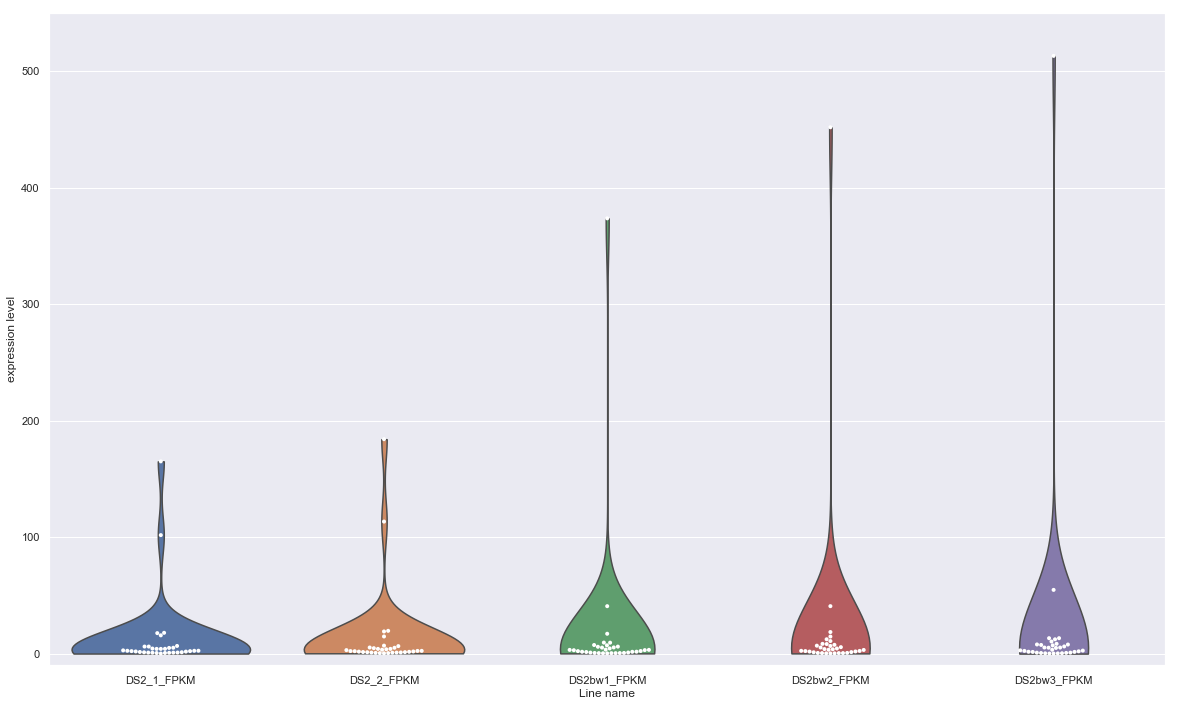

In [148]:
#Trinity_DS2
ax = sns.violinplot(data=trinity_DS2_selcted, inner=None, cut=0)
ax = sns.swarmplot(data=trinity_DS2_selcted, color="white", size=4)
ax.set(ylim=(-10, 550))
ax.set(xlabel='Line name', ylabel='expression level')

In [149]:
y = trinity_DS2_selcted.mean()
data_DS2_mean = pd.DataFrame(data=y)

z = trinity_DS2_selcted.median()
data_DS2_med = pd.DataFrame(data=z)

data = pd.concat([data_DS2_mean, data_DS2_med], axis=1)
data.columns = ["Mean", "Median"]

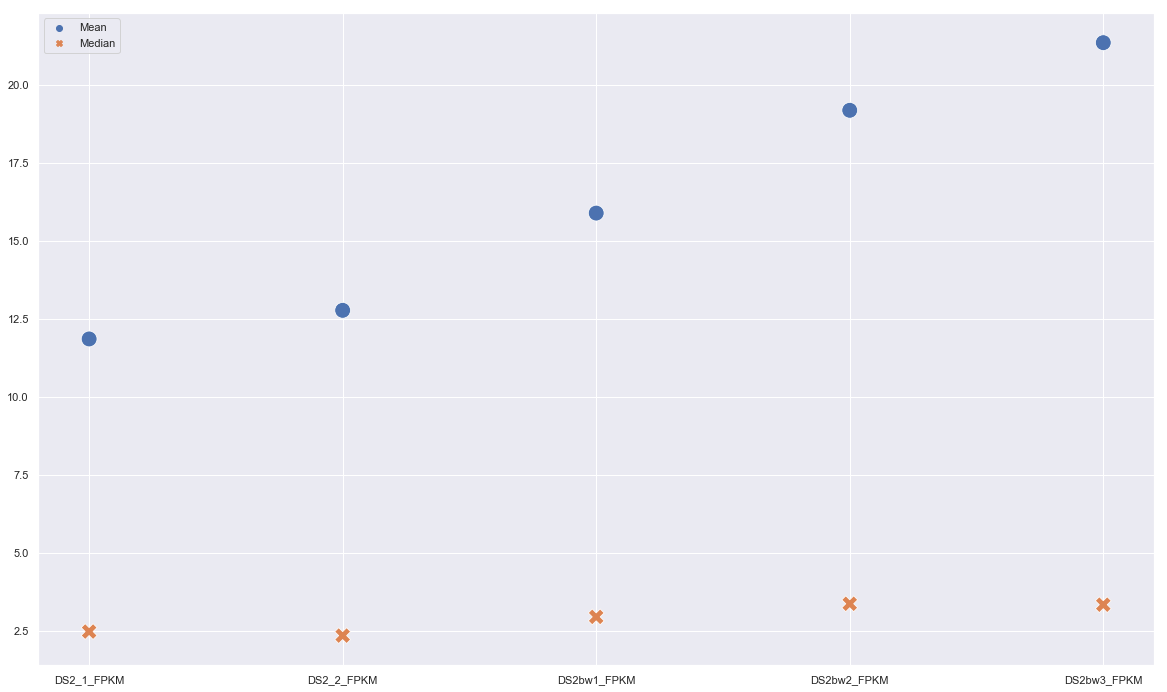

In [150]:
ax = sns.scatterplot(data=data, s=250)

[Text(0, 0.5, 'expression level'), Text(0.5, 0, 'Line name')]

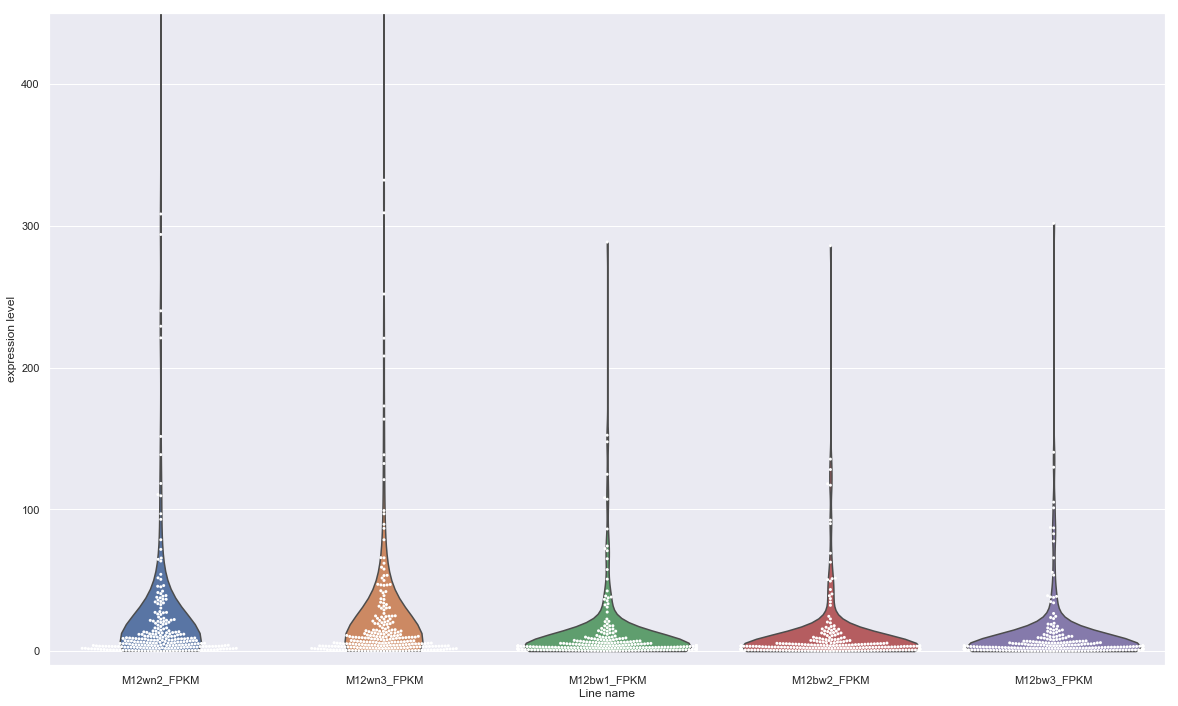

In [151]:
# Trinity M12
ax = sns.violinplot(data = trinity_M12_selcted, cut=0, inner=None)
ax.set(ylim=(-10, 450))
ax = sns.swarmplot(data=trinity_M12_selcted, color="white", size=3)
ax.set(xlabel='Line name', ylabel='expression level')

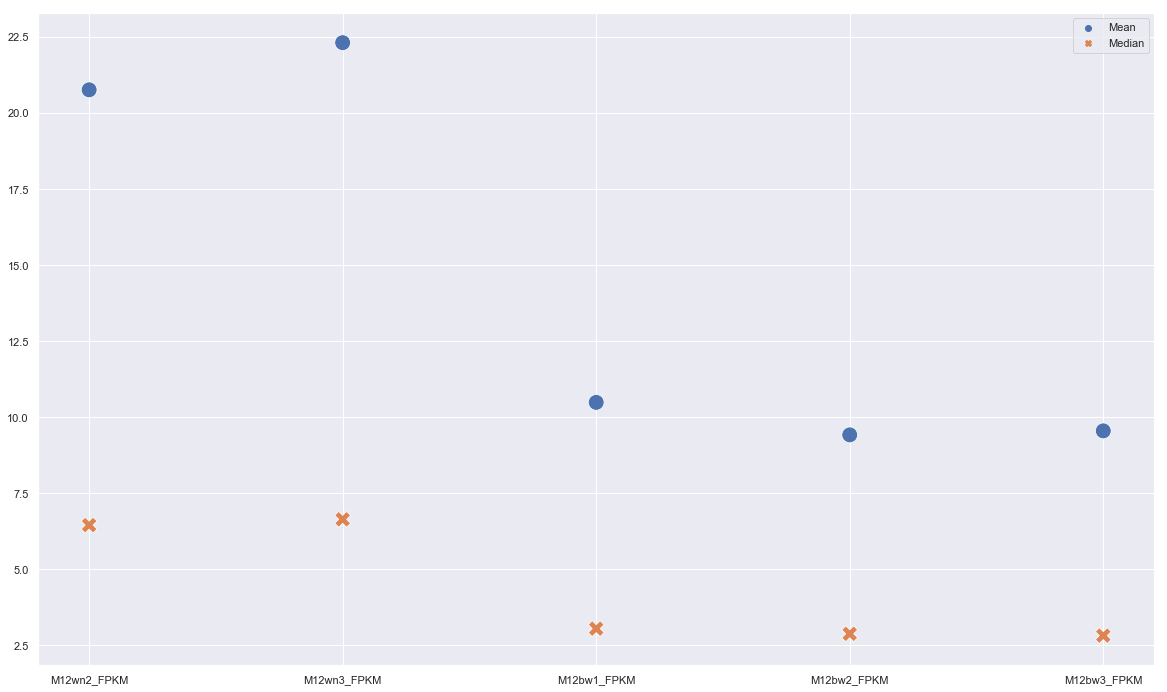

In [152]:
y = trinity_M12_selcted.mean()
data_DS2_mean = pd.DataFrame(data=y)

z = trinity_M12_selcted.median()
data_DS2_med = pd.DataFrame(data=z)

data = pd.concat([data_DS2_mean, data_DS2_med], axis=1, sort=None)
data.columns = ["Mean", "Median"]
ax = sns.scatterplot(data=data, s=250)

[Text(0, 0.5, 'expression level'), Text(0.5, 0, 'Line name')]

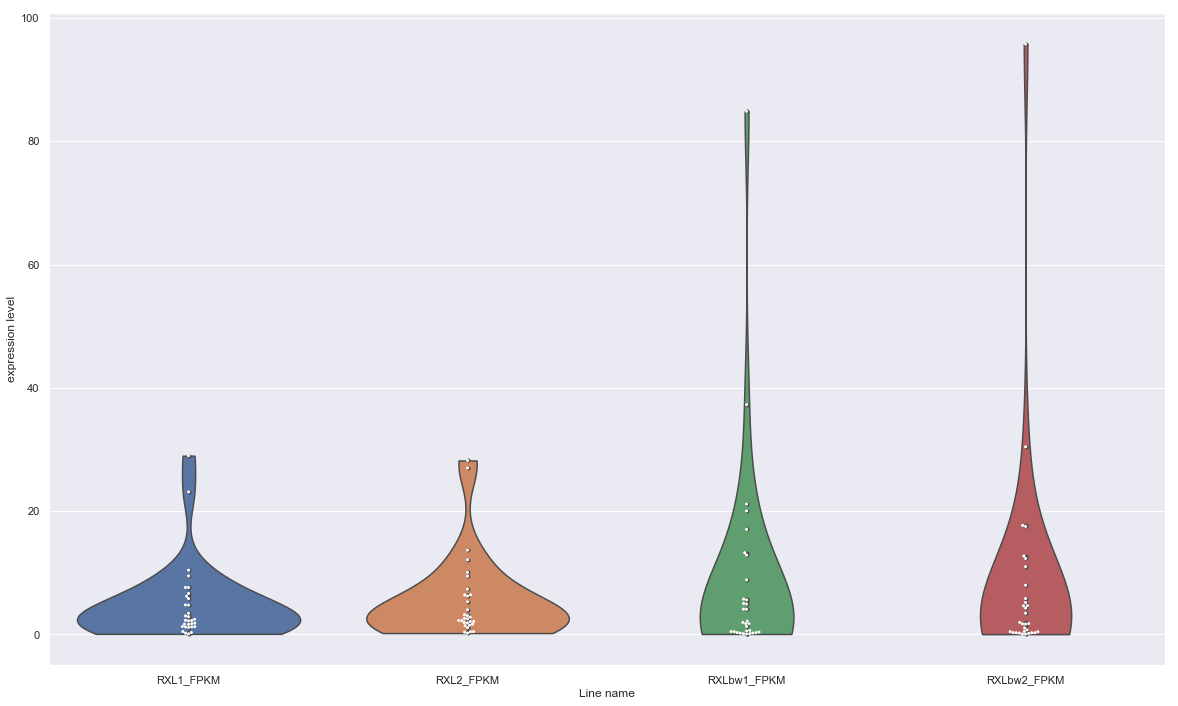

In [153]:
# Trinity RXL
ax = sns.violinplot(data = trinity_RXL_selcted, cut=0, inner="point")
ax = sns.swarmplot(data=trinity_RXL_selcted, color="white", size=3)

ax.set(xlabel='Line name', ylabel='expression level')

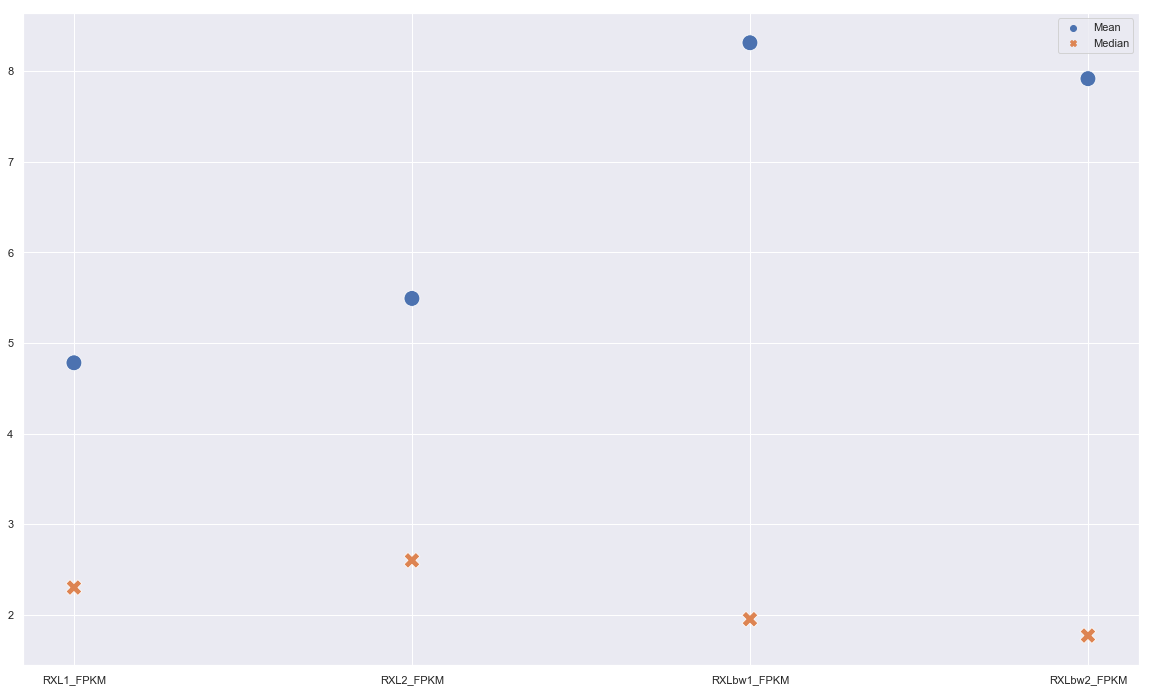

In [154]:
y = trinity_RXL_selcted.mean()
data_DS2_mean = pd.DataFrame(data=y)

z = trinity_RXL_selcted.median()
data_DS2_med = pd.DataFrame(data=z)

data = pd.concat([data_DS2_mean, data_DS2_med], axis=1, sort=None)
data.columns = ["Mean", "Median"]
ax = sns.scatterplot(data=data, s=250)

In [155]:
#trinity_DS2_selcted.to_csv("trinity_DS2_selcted.csv", sep=',')
#trinity_DS2_selcted.head()

In [156]:
#trinity_M12_selcted.to_csv("wstępne_opracowanie/trinity_M12_selcted.csv", sep=',')
#trinity_M12_selcted.head()

In [157]:
#trinity_RXL_selcted.to_csv("wstępne_opracowanie/trinity_RXL_selcted.csv", sep=',')
#trinity_RXL_selcted.head()

### Data searching in NCBI database by contigs name from FASTA files

In [43]:
from Bio import SeqIO
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

### Data pre-process

In [44]:
#progressbar
from IPython.display import display, clear_output
import time

In [46]:
#replacment tab to \n 
with open("Trinity.fasta", "r") as handle:
    data = handle.read()

data_out = data.replace("	", "\n")

with open("Trinity_ready.fasta", "w") as out:
    out.write(data_out)

### NCBI`s Api and Parser tests

In [47]:
def contig_finder(sel_contigs):
    id_list = []
    seq_list = []
    with open("Trinity_ready.fasta", "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
        
            if record.id in sel_contigs:
                id_list.append(record.id)
                seq_list.append(record.seq)

    query_dict = dict(zip(id_list, seq_list))
    return query_dict, id_list

In [49]:
querry_dict, id_list = contig_finder(trinity_M12_selcted.index)

In [50]:
file = open("Contigs.xml", 'w')
tim = []
start = 0
end = 0

for counter, contig_data in enumerate(id_list): #Api and parser test
    start = time.time()
    
    querry = str(querry_dict.get(contig_data))

    result_handle = NCBIWWW.qblast(program="blastn", database="nt",
                                   sequence=querry, format_type="XML", 
                                   hitlist_size=10) # megablast=True        
    clear_output()
    display(print("Sequence no. {}/{} id: {}".format((counter), 
                                                     len(id_list), contig_data)))
    
    if len(tim) < 1:
        display(print("estimation of duration in progress"))
    
    else:
        mean_time = sum(tim)/len(tim)
        querry_time = (mean_time * (len(id_list) - (counter))) / 60 #min    
        
        e_time = "Estimated duration {}m".format(round(querry_time, 2))
        display(e_time)
    
    progress = "Progress: {}%".format(round((counter+1)/len(id_list) * 100, 2))
    display(progress)
    
    file.write(result_handle.read())
    
    if counter % 30 == 0 and counter != 0: #NCBI conditions
        
        display(print('sleep'))
        time.sleep(60*25)
    
    else:
        time.sleep(30)

    end = time.time()
    loop_time = end - start
    tim.append(loop_time)
    
file.close()

Sequence no. 268/268 id: c136205_g1_i1


None

'Estimated duration 0.0m'

'Progress: 100.0%'

In [51]:
e_threshold = 0.01

In [52]:
blast_output = open("Contigs.xml")
blast_records = NCBIXML.parse(blast_output)
blast_results = {}

In [53]:
for counter, alignment in enumerate(blast_records):
    
    con_id = id_list[counter]
    rec_list = []
    
    for counter, records in enumerate(alignment.alignments):
        
                
        for single_rec in records.hsps:
          
          if single_rec.expect < e_threshold:
                rec_list.append(records.title)
    
    blast_results.update({con_id:str(rec_list)})           

In [54]:
df_res = pd.DataFrame(data=blast_results, index=["Description"]).transpose()

In [55]:
df_res.to_csv("Blast_Results_M12.csv", sep=";")

### Blast results validation

In [158]:
ds2_cont = ds2_data_selected[["Contig"]].values
m12_cont = m12_data_selected[["Contig"]].values
rxl_cont = rxl_data_selected[["Contig"]].values

In [159]:
len(ds2_cont)

33

In [160]:
len(m12_cont)

268

In [161]:
len(rxl_cont)

31

In [162]:
blast_ds2 = pd.read_csv("Blast/Blast_Results_DS2.csv", sep=";")
blast_m12 = pd.read_csv("Blast/Blast_Results_M12.csv", sep=";")
blast_rxl = pd.read_csv("Blast/Blast_Results_RXL.csv", sep=";")

In [163]:
Blast_ds2_contigs = blast_ds2.iloc[:, 0]
Blast_m12_contigs = blast_m12.iloc[:, 0]
Blast_rxl_contigs = blast_rxl.iloc[:, 0]

In [164]:
len(Blast_ds2_contigs) == len(ds2_cont)

True

In [165]:
len(Blast_m12_contigs) == len(m12_cont)

True

In [166]:
len(Blast_rxl_contigs) == len(rxl_cont)

True

In [167]:
a = 0
for data in Blast_ds2_contigs:
    for data_2 in ds2_cont:
        if data == data_2:
            a += 1
            continue
            
a == len(Blast_ds2_contigs) == len(ds2_cont)

True

In [168]:
a = 0
for data in Blast_m12_contigs:
    for data_2 in m12_cont:
        if data == data_2:
            a += 1
            continue
            
a == len(Blast_m12_contigs) == len(m12_cont)

True

In [169]:
a = 0
for data in Blast_rxl_contigs:
    for data_2 in rxl_cont:
        if data == data_2:
            a += 1
            continue
            
a == len(Blast_rxl_contigs) == len(rxl_cont)

True

### some pattern in ncbi conditions ??? [probably ncbi inhibits periodic inquiries by api]

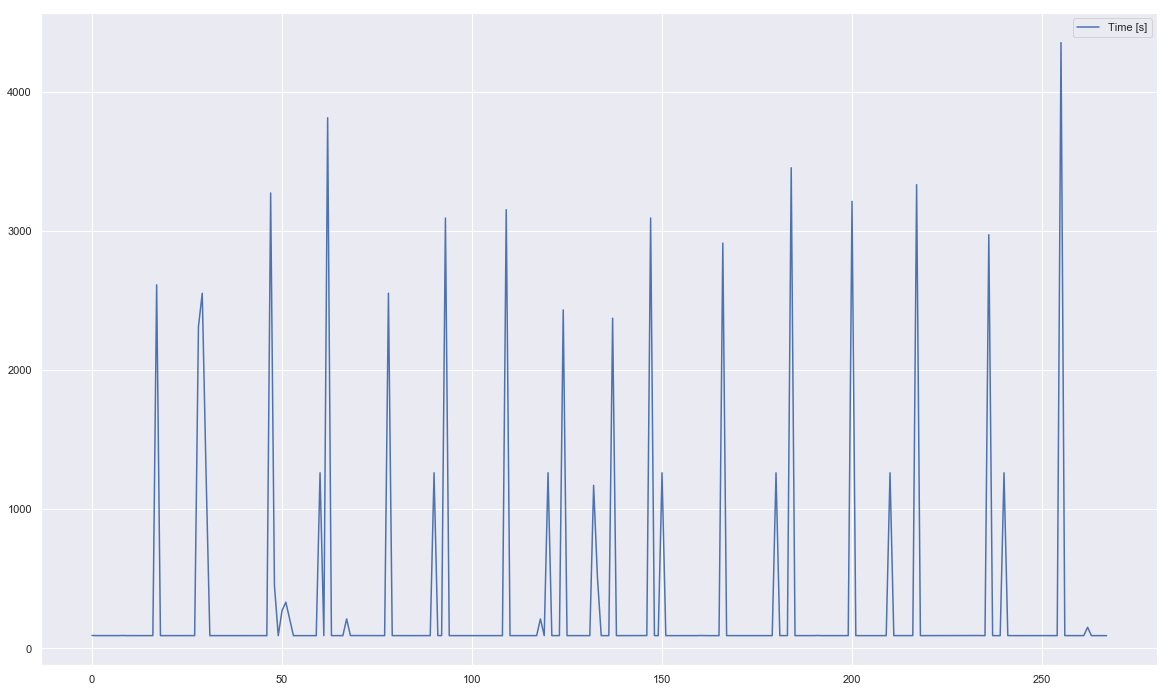

In [223]:
time_spend = pd.DataFrame(tim, columns=["Time [s]"])
sns.lineplot(data=time_spend)

### ML (Logistic regression and KNN and Decision Tree)

In [170]:
#new (lower) parameters of selection
x = 0.5
y = 0.2
z = -0.2

In [171]:
ds2_data_selected = ds2_data[(ds2_data["DS2bw/DS2.raw.pval"] < x) & ((ds2_data["DS2bw/DS2.fc"] > y) | (ds2_data["DS2bw/DS2.fc"] < z))]
m12_data_selected = m12_data[(m12_data["M12bw/M12wn.raw.pval"] < x) & ((m12_data["M12bw/M12wn.fc"] > y) | (m12_data["M12bw/M12wn.fc"] < z))]
rxl_data_selected = rxl_data[(rxl_data["RXLbw/RXL.raw.pval"] < x) & ((rxl_data["RXLbw/RXL.fc"] > y) | (rxl_data["RXLbw/RXL.fc"] < z))]

In [172]:
ds2_data_selected_ready = ds2_data_selected.set_index("Contig", drop=True) #'Contig' as index
m12_data_selected_ready = m12_data_selected.set_index("Contig", drop=True)
rxl_data_selected_ready = rxl_data_selected.set_index("Contig", drop=True)

In [173]:
selected_contigs_ds = list(ds2_data_selected_ready.index) #get index name from data after selection
selected_contigs_m = list(m12_data_selected_ready.index)
selected_contigs_rxl = list(rxl_data_selected_ready.index)

sum_selected_contigs = list(set(selected_contigs_ds + selected_contigs_m + selected_contigs_rxl))

trinity_DS2_selcted = trinity_DS2.loc[selected_contigs_ds] #use selected index from ds2/m12/rxl on Trinity
trinity_M12_selcted = trinity_m12.loc[selected_contigs_m] 
trinity_RXL_selcted = trinity_RXL.loc[selected_contigs_rxl]

In [174]:
try:
    del trinity_DS2_selcted.index.name
    del trinity_M12_selcted.index.name
    del trinity_RXL_selcted.index.name
except:
    pass

In [175]:
trinity_ds2_ready = trinity_DS2_selcted.transpose()
trinity_m12_ready = trinity_M12_selcted.transpose()
trinity_rxl_ready = trinity_RXL_selcted.transpose()

In [176]:
trinity_ds2_ready_r = trinity_ds2_ready.reset_index()
trinity_m12_ready_r = trinity_m12_ready.reset_index()
trinity_rxl_ready_r = trinity_rxl_ready.reset_index()

In [177]:
try:
    trinity_ds2_ready_r["index"].replace(["DS2_1_FPKM", "DS2_2_FPKM"], 1, inplace=True)
    trinity_m12_ready_r["index"].replace(["M12wn2_FPKM", "M12wn3_FPKM"], 1, inplace=True)
    trinity_rxl_ready_r["index"].replace(["RXL1_FPKM", "RXL2_FPKM"], 1, inplace=True)

    trinity_ds2_ready_r["index"].replace(["DS2bw1_FPKM", "DS2bw2_FPKM", "DS2bw3_FPKM"], 0, inplace=True)
    trinity_m12_ready_r["index"].replace(["M12bw1_FPKM", "M12bw2_FPKM", "M12bw3_FPKM"], 0, inplace=True)
    trinity_rxl_ready_r["index"].replace(["RXLbw1_FPKM", "RXLbw2_FPKM"], 0, inplace=True)

except():
    pass

In [178]:
col_x = list(trinity_ds2_ready_r.columns)
col_x[0] = "Class"
trinity_ds2_ready_r.columns = col_x

col_x = list(trinity_m12_ready_r.columns)
col_x[0] = "Class"
trinity_m12_ready_r.columns = col_x

col_x = list(trinity_rxl_ready_r.columns)
col_x[0] = "Class"
trinity_rxl_ready_r.columns = col_x

In [179]:
print("trinity_ds2_ready")
trinity_ds2_ready.info()
print("-"*50)
print("trinity_m12_ready")
trinity_m12_ready.info()
print("-"*50)
print("trinity_rxl_ready")
trinity_rxl_ready.info()

trinity_ds2_ready
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, DS2_1_FPKM to DS2bw3_FPKM
Columns: 48355 entries, c58_g1_i1 to c145435_g1_i1
dtypes: float32(48355)
memory usage: 944.6+ KB
--------------------------------------------------
trinity_m12_ready
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, M12wn2_FPKM to M12bw3_FPKM
Columns: 48478 entries, c58_g1_i1 to c145561_g1_i1
dtypes: float32(48478)
memory usage: 947.0+ KB
--------------------------------------------------
trinity_rxl_ready
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, RXL1_FPKM to RXLbw2_FPKM
Columns: 45281 entries, c58_g1_i1 to c145783_g1_i1
dtypes: float32(45281)
memory usage: 707.7+ KB


In [180]:
reduce_con_list = trinity_rxl_ready_r.columns.tolist()
m12_list = trinity_m12_ready_r.columns.tolist()
ds2_list = trinity_ds2_ready_r.columns.tolist()

reduce_con_list = set(reduce_con_list)
m12_list = set(m12_list)
ds2_list = set(ds2_list)

contigs = list(ds2_list.intersection(m12_list, reduce_con_list))
contigs_r = []

for e in contigs:
    if e != "Class":
        contigs_r.append(e)
    else:
        continue

In [181]:
if len(contigs_r) > 1:
    trinity_rxl_ready = trinity_rxl_ready_r[contigs]
    trinity_m12_ready = trinity_m12_ready_r[contigs]
    trinity_ds2_ready = trinity_ds2_ready_r[contigs]

    dataf = pd.concat([trinity_ds2_ready, trinity_m12_ready, trinity_rxl_ready])
    x_set = dataf.columns.tolist()    
else:
    print("No data, change selection parameters")

In [182]:
y = dataf["Class"]
x = dataf[x_set]

### Logistic Regression

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [191]:
lg = LogisticRegression(solver="lbfgs")
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [192]:
predictions = lg.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0], dtype=int64)

In [193]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



### KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier(n_neighbors=1)

In [197]:
scal = StandardScaler()
scal.fit(x)
scaled_features = scal.transform(x)

c:\users\jan\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\jan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype float32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [203]:
pred = knn.predict(X_test)

In [204]:
print(confusion_matrix(y_test,pred))

[[2 2]
 [0 2]]


Text(0, 0.5, 'Error Rate')

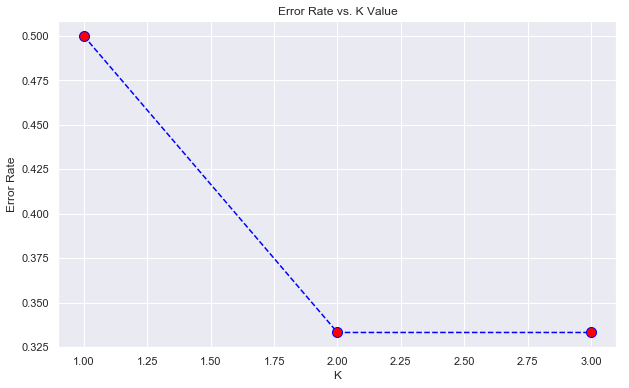

In [205]:
error_rate = []
for i in range(1,4):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,4),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')